<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
raw_df = raw_df.dropna()
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 47.4 KB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((379, 13), (127, 13))

#### 1.2. Проектируем архитектуру для этой задачи

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import pickle

mms = MinMaxScaler()

X_train_n = mms.fit_transform(X_train)
X_test_n = mms.transform(X_test)

with open("/content/drive/MyDrive/models/scaler.pkl", "wb") as f:
    pickle.dump(mms, f)

model = Sequential([
    Dense(16, input_shape=(13,), activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [ ]:
from keras.optimizers import Adam

INIT_LR = 0.0004

model.compile(Adam(INIT_LR), loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [ ]:
EPOCHS = 220

History = model.fit(X_train_n, y_train, validation_data=(X_test_n, y_test),
	epochs=EPOCHS, batch_size=100)

Epoch 1/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - loss: 586.5878 - mae: 22.3040 - val_loss: 565.2187 - val_mae: 21.9959
Epoch 2/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 590.5756 - mae: 22.4002 - val_loss: 563.9776 - val_mae: 21.9678
Epoch 3/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 598.4906 - mae: 22.6107 - val_loss: 562.7145 - val_mae: 21.9393
Epoch 4/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 563.5895 - mae: 21.9109 - val_loss: 561.3985 - val_mae: 21.9093
Epoch 5/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 580.5298 - mae: 22.1485 - val_loss: 560.0374 - val_mae: 21.8781
Epoch 6/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 573.3945 - mae: 22.0826 - val_loss: 558.6369 - val_mae: 21.8458
Epoch 7/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 583.4509 - mae: 22.2628 - val_loss: 557.1909 - val_mae: 21.8124
Epoch 8/220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 582.5070 - mae: 22.3505 - val_loss: 555.6946 - val_mae: 21.7777
Epoch 9/220
4/4 ━━━━━━━

#### 1.6. Делаем предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test_n)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

5.695276897160088

#### 1.8. Строим график обучения

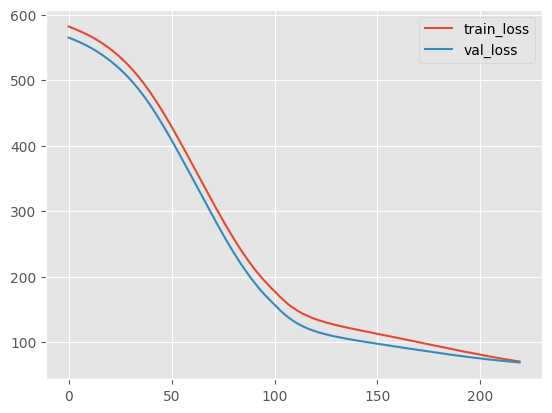

In [ ]:
import matplotlib.pyplot as plt

# строим графики потерь
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, History.history["loss"], label="train_loss")
plt.plot(N, History.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
model.save("best_model_2_1.h5", save_format="h5")

In [ ]:
from keras.models import load_model
from keras.losses import MeanSquaredError

model = load_model("/content/drive/MyDrive/models/best_model_2_1.h5",
                   custom_objects={'mse': MeanSquaredError()})

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
def preprocess_input(features, scale_model="/content/drive/MyDrive/models/scaler.pkl"):

  try:
    features = np.array(features)

    if not features.size:
      raise ValueError("Пустой массив признаков!")

    features = features.reshape(1, -1)

    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [ ]:
def predict_price(*features):

  try:
    features = preprocess_input(features)

    prediction = model.predict(features, verbose=0)

    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  return f"{prediction[0][0] * 1000}"

#### 2. Проверка обученной модели пользовательскими данными

In [ ]:
import gradio as gr

app = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0, maximum=100, value=4, step=0.1),
        gr.Slider(label="ZN", minimum=0, maximum=100, value=12, step=0.1),
        gr.Slider(label="INDUS", minimum=0, maximum=30, value=12, step=0.1),
        gr.Slider(label="CHAS", minimum=0, maximum=1, value=0, step=1),
        gr.Slider(label="NOX", minimum=0, maximum=1, value=0.6, step=0.001),
        gr.Slider(label="RM", minimum=0, maximum=10, value=6, step=0.01),
        gr.Slider(label="AGE", minimum=0, maximum=100, value=70, step=1),
        gr.Slider(label="DIS", minimum=0, maximum=15, value=4, step=0.1),
        gr.Slider(label="RAD", minimum=0, maximum=25, value=10, step=0.1),
        gr.Slider(label="TAX", minimum=0, maximum=1000, value=400, step=1),
        gr.Slider(label="PTRATIO", minimum=0, maximum=25, value=18, step=0.1),
        gr.Slider(label="B", minimum=0, maximum=100, step=0.1),
        gr.Slider(label="LSTAT", minimum=0, maximum=100, step=0.1)
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
app.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cc7dd088b6efa417d1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cc7dd088b6efa417d1.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Указываем путь к набору данных:

In [ ]:
# Путь к папке с данными
base_directory = '/content/drive/MyDrive/animals_dataset'

# Сбор всех изображений .jpeg
imagePaths = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.lower().endswith('.jpeg'):
            image_path = os.path.join(root, file)
            if 'Бабочки' in root or 'Слоны' in root or 'Пауки' in root:
                imagePaths.append(image_path)

print(f"Всего изображений: {len(imagePaths)}")

Всего изображений: 3318


In [ ]:
data = []
labels = []

### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
# цикл по изображениям
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)
trainX.shape, testX.shape, trainY.shape, testY.shape

((2488, 3072), (830, 3072), (2488,), (830,))

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
compression_size = 32
input_shape = (compression_size * compression_size * 3,)

# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(3072, input_shape=input_shape, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.0000001
EPOCHS = 1000

#### 5.3. Компилируем модель:

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Остановка обучения, если валидационная точность не улучшается в течение 5 эпох
early_stopping = EarlyStopping(patience=5)

# Сохранение модели только при улучшении валидационной точности
checkpoint = ModelCheckpoint(filepath="best_model_2_2.h5", monitor="val_accuracy",
                             save_best_only=True, verbose=0)

#### 6.2. Запустим процесс обучения модели:

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS,
              batch_size=100, callbacks=[early_stopping, checkpoint])

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3572 - loss: 1.1094

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.3574 - loss: 1.1093 - val_accuracy: 0.3506 - val_loss: 1.1041
Epoch 2/1000
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3499 - loss: 1.1042

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3567 - loss: 1.1035 - val_accuracy: 0.3554 - val_loss: 1.1001
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3803 - loss: 1.1011 - val_accuracy: 0.3542 - val_loss: 1.0968
Epoch 4/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4043 - loss: 1.0939

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4003 - loss: 1.0942 - val_accuracy: 0.3639 - val_loss: 1.0939
Epoch 5/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3951 - loss: 1.0911

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3943 - loss: 1.0912 - val_accuracy: 0.3675 - val_loss: 1.0910
Epoch 6/1000
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4015 - loss: 1.0890

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4007 - loss: 1.0890 - val_accuracy: 0.3759 - val_loss: 1.0884
Epoch 7/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3970 - loss: 1.0890

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3969 - loss: 1.0883 - val_accuracy: 0.3771 - val_loss: 1.0855
Epoch 8/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4025 - loss: 1.0827

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.4024 - loss: 1.0827 - val_accuracy: 0.3831 - val_loss: 1.0835
Epoch 9/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4051 - loss: 1.0839

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4049 - loss: 1.0834 - val_accuracy: 0.3880 - val_loss: 1.0811
Epoch 10/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4051 - loss: 1.0793

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4059 - loss: 1.0789 - val_accuracy: 0.3928 - val_loss: 1.0785
Epoch 11/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4034 - loss: 1.0754

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4057 - loss: 1.0754 - val_accuracy: 0.3952 - val_loss: 1.0766
Epoch 12/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4060 - loss: 1.0752

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4090 - loss: 1.0746 - val_accuracy: 0.4036 - val_loss: 1.0744
Epoch 13/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4160 - loss: 1.0667

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4171 - loss: 1.0670 - val_accuracy: 0.4048 - val_loss: 1.0723
Epoch 14/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4303 - loss: 1.0685 - val_accuracy: 0.4036 - val_loss: 1.0703
Epoch 15/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4178 - loss: 1.0688

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4227 - loss: 1.0676 - val_accuracy: 0.4072 - val_loss: 1.0680
Epoch 16/1000
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4519 - loss: 1.0577

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4509 - loss: 1.0582 - val_accuracy: 0.4084 - val_loss: 1.0661
Epoch 17/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4558 - loss: 1.0580

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.4555 - loss: 1.0581 - val_accuracy: 0.4145 - val_loss: 1.0643
Epoch 18/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4565 - loss: 1.0582

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4558 - loss: 1.0579 - val_accuracy: 0.4229 - val_loss: 1.0624
Epoch 19/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4479 - loss: 1.0551

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4483 - loss: 1.0551 - val_accuracy: 0.4277 - val_loss: 1.0604
Epoch 20/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4765 - loss: 1.0470

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4730 - loss: 1.0481 - val_accuracy: 0.4301 - val_loss: 1.0585
Epoch 21/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4684 - loss: 1.0545

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4697 - loss: 1.0531 - val_accuracy: 0.4386 - val_loss: 1.0565
Epoch 22/1000
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4668 - loss: 1.0479

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4678 - loss: 1.0478 - val_accuracy: 0.4422 - val_loss: 1.0550
Epoch 23/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4748 - loss: 1.0457

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4752 - loss: 1.0457 - val_accuracy: 0.4530 - val_loss: 1.0532
Epoch 24/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4871 - loss: 1.0407

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.4870 - loss: 1.0408 - val_accuracy: 0.4542 - val_loss: 1.0516
Epoch 25/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4720 - loss: 1.0451

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4745 - loss: 1.0444 - val_accuracy: 0.4639 - val_loss: 1.0496
Epoch 26/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4874 - loss: 1.0407

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4877 - loss: 1.0406 - val_accuracy: 0.4687 - val_loss: 1.0478
Epoch 27/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5028 - loss: 1.0309

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5025 - loss: 1.0311 - val_accuracy: 0.4711 - val_loss: 1.0462
Epoch 28/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5179 - loss: 1.0308

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5156 - loss: 1.0312 - val_accuracy: 0.4783 - val_loss: 1.0445
Epoch 29/1000
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4950 - loss: 1.0350

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4962 - loss: 1.0347 - val_accuracy: 0.4807 - val_loss: 1.0429
Epoch 30/1000
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5036 - loss: 1.0266

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5041 - loss: 1.0275 - val_accuracy: 0.4843 - val_loss: 1.0413
Epoch 31/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4984 - loss: 1.0346

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.5032 - loss: 1.0324 - val_accuracy: 0.4916 - val_loss: 1.0398
Epoch 32/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5087 - loss: 1.0250

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5101 - loss: 1.0250 - val_accuracy: 0.4940 - val_loss: 1.0381
Epoch 33/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5187 - loss: 1.0232

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5189 - loss: 1.0232 - val_accuracy: 0.4988 - val_loss: 1.0366
Epoch 34/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5029 - loss: 1.0280 - val_accuracy: 0.4988 - val_loss: 1.0350
Epoch 35/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5251 - loss: 1.0210

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.5253 - loss: 1.0207 - val_accuracy: 0.5012 - val_loss: 1.0339
Epoch 36/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5365 - loss: 1.0155

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5358 - loss: 1.0158 - val_accuracy: 0.5036 - val_loss: 1.0321
Epoch 37/1000
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5297 - loss: 1.0155

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5300 - loss: 1.0155 - val_accuracy: 0.5072 - val_loss: 1.0309
Epoch 38/1000
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5388 - loss: 1.0128

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.5386 - loss: 1.0129 - val_accuracy: 0.5096 - val_loss: 1.0294
Epoch 39/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5445 - loss: 1.0131 - val_accuracy: 0.5096 - val_loss: 1.0280
Epoch 40/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5521 - loss: 1.0076 - val_accuracy: 0.5084 - val_loss: 1.0268
Epoch 41/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5424 - loss: 1.0144

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5426 - loss: 1.0142 - val_accuracy: 0.5145 - val_loss: 1.0252
Epoch 42/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5595 - loss: 1.0057 - val_accuracy: 0.5133 - val_loss: 1.0241
Epoch 43/1000
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5546 - loss: 1.0118

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5551 - loss: 1.0094 - val_accuracy: 0.5229 - val_loss: 1.0227
Epoch 44/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5614 - loss: 0.9955

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5602 - loss: 0.9976 - val_accuracy: 0.5241 - val_loss: 1.0214
Epoch 45/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5397 - loss: 1.0049

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5426 - loss: 1.0044 - val_accuracy: 0.5289 - val_loss: 1.0201
Epoch 46/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5600 - loss: 1.0029 - val_accuracy: 0.5265 - val_loss: 1.0192
Epoch 47/1000
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5541 - loss: 0.9998

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5561 - loss: 0.9998 - val_accuracy: 0.5373 - val_loss: 1.0177
Epoch 48/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5708 - loss: 0.9931 - val_accuracy: 0.5349 - val_loss: 1.0165
Epoch 49/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5558 - loss: 0.9976

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5599 - loss: 0.9969 - val_accuracy: 0.5434 - val_loss: 1.0154
Epoch 50/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5753 - loss: 0.9966 - val_accuracy: 0.5410 - val_loss: 1.0143
Epoch 51/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5852 - loss: 0.9917 - val_accuracy: 0.5434 - val_loss: 1.0128
Epoch 52/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5545 - loss: 1.0010

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5619 - loss: 0.9972 - val_accuracy: 0.5446 - val_loss: 1.0118
Epoch 53/1000
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5794 - loss: 0.9862

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5794 - loss: 0.9875 - val_accuracy: 0.5518 - val_loss: 1.0109
Epoch 54/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5893 - loss: 0.9828

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5887 - loss: 0.9834 - val_accuracy: 0.5530 - val_loss: 1.0095
Epoch 55/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5675 - loss: 0.9845 - val_accuracy: 0.5518 - val_loss: 1.0086
Epoch 56/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5699 - loss: 0.9913

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5706 - loss: 0.9910 - val_accuracy: 0.5554 - val_loss: 1.0075
Epoch 57/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5851 - loss: 0.9817 - val_accuracy: 0.5554 - val_loss: 1.0063
Epoch 58/1000
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5946 - loss: 0.9806

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.5926 - loss: 0.9808 - val_accuracy: 0.5566 - val_loss: 1.0050
Epoch 59/1000
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5973 - loss: 0.9796

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5967 - loss: 0.9796 - val_accuracy: 0.5590 - val_loss: 1.0044
Epoch 60/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5963 - loss: 0.9759 - val_accuracy: 0.5590 - val_loss: 1.0034
Epoch 61/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5833 - loss: 0.9833

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5846 - loss: 0.9823 - val_accuracy: 0.5602 - val_loss: 1.0019
Epoch 62/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5906 - loss: 0.9726

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5908 - loss: 0.9731 - val_accuracy: 0.5614 - val_loss: 1.0011
Epoch 63/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5825 - loss: 0.9792

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5843 - loss: 0.9783 - val_accuracy: 0.5639 - val_loss: 1.0001
Epoch 64/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5974 - loss: 0.9755 - val_accuracy: 0.5627 - val_loss: 0.9992
Epoch 65/1000
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5953 - loss: 0.9755

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5955 - loss: 0.9751 - val_accuracy: 0.5663 - val_loss: 0.9981
Epoch 66/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6035 - loss: 0.9702 - val_accuracy: 0.5651 - val_loss: 0.9974
Epoch 67/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6084 - loss: 0.9655

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6053 - loss: 0.9662 - val_accuracy: 0.5687 - val_loss: 0.9963
Epoch 68/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5815 - loss: 0.9745 - val_accuracy: 0.5675 - val_loss: 0.9955
Epoch 69/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5875 - loss: 0.9708

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5899 - loss: 0.9694 - val_accuracy: 0.5711 - val_loss: 0.9946
Epoch 70/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6034 - loss: 0.9629

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6016 - loss: 0.9635 - val_accuracy: 0.5735 - val_loss: 0.9937
Epoch 71/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5950 - loss: 0.9635 - val_accuracy: 0.5735 - val_loss: 0.9927
Epoch 72/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6035 - loss: 0.9633 - val_accuracy: 0.5735 - val_loss: 0.9918
Epoch 73/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6026 - loss: 0.9620 - val_accuracy: 0.5735 - val_loss: 0.9909
Epoch 74/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5966 - loss: 0.9624 - val_accuracy: 0.5723 - val_loss: 0.9901
Epoch 75/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6016 - loss: 0.9587

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6027 - loss: 0.9582 - val_accuracy: 0.5759 - val_loss: 0.9894
Epoch 76/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6070 - loss: 0.9537 - val_accuracy: 0.5735 - val_loss: 0.9885
Epoch 77/1000
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5969 - loss: 0.9546

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5984 - loss: 0.9550 - val_accuracy: 0.5771 - val_loss: 0.9875
Epoch 78/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5900 - loss: 0.9600 - val_accuracy: 0.5735 - val_loss: 0.9865
Epoch 79/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6184 - loss: 0.9498 - val_accuracy: 0.5759 - val_loss: 0.9858
Epoch 80/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6047 - loss: 0.9496 - val_accuracy: 0.5735 - val_loss: 0.9854
Epoch 81/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6086 - loss: 0.9454 - val_accuracy: 0.5723 - val_loss: 0.9843
Epoch 82/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6113 - loss: 0.9483 - val_accuracy: 0.5759 - val_loss: 0.9837
Epoch 83/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6187 - loss: 0.9455 - val_accuracy: 0.5735 - val_loss: 0.9826
Epoch 84/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6073 - loss: 0.9535 - val_accuracy: 0.574

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5857 - loss: 0.9594 - val_accuracy: 0.5795 - val_loss: 0.9810
Epoch 86/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6199 - loss: 0.9374 - val_accuracy: 0.5795 - val_loss: 0.9803
Epoch 87/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6016 - loss: 0.9467 - val_accuracy: 0.5759 - val_loss: 0.9794
Epoch 88/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6135 - loss: 0.9348 - val_accuracy: 0.5759 - val_loss: 0.9790
Epoch 89/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6025 - loss: 0.9482 - val_accuracy: 0.5759 - val_loss: 0.9780
Epoch 90/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6082 - loss: 0.9423 - val_accuracy: 0.5759 - val_loss: 0.9772
Epoch 91/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6213 - loss: 0.9416 - val_accuracy: 0.5759 - val_loss: 0.9764
Epoch 92/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6183 - loss: 0.9375 - val_accuracy: 0.57

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6285 - loss: 0.9319 - val_accuracy: 0.5807 - val_loss: 0.9748
Epoch 94/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6152 - loss: 0.9371 - val_accuracy: 0.5759 - val_loss: 0.9743
Epoch 95/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6273 - loss: 0.9331 - val_accuracy: 0.5783 - val_loss: 0.9738
Epoch 96/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6166 - loss: 0.9298 - val_accuracy: 0.5747 - val_loss: 0.9728
Epoch 97/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6237 - loss: 0.9308 - val_accuracy: 0.5783 - val_loss: 0.9721
Epoch 98/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6079 - loss: 0.9378 - val_accuracy: 0.5759 - val_loss: 0.9716
Epoch 99/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6160 - loss: 0.9293 - val_accuracy: 0.5759 - val_loss: 0.9710
Epoch 100/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6293 - loss: 0.9206 - val_accuracy: 

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6194 - loss: 0.9207 - val_accuracy: 0.5819 - val_loss: 0.9659
Epoch 107/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6196 - loss: 0.9181 - val_accuracy: 0.5807 - val_loss: 0.9654
Epoch 108/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6111 - loss: 0.9195 - val_accuracy: 0.5807 - val_loss: 0.9650
Epoch 109/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6043 - loss: 0.9239 - val_accuracy: 0.5795 - val_loss: 0.9644
Epoch 110/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6214 - loss: 0.9180 - val_accuracy: 0.5819 - val_loss: 0.9637
Epoch 111/1000
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6352 - loss: 0.9094

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6319 - loss: 0.9114 - val_accuracy: 0.5867 - val_loss: 0.9627
Epoch 112/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6177 - loss: 0.9243 - val_accuracy: 0.5855 - val_loss: 0.9625
Epoch 113/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6286 - loss: 0.9138 - val_accuracy: 0.5843 - val_loss: 0.9619
Epoch 114/1000
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6224 - loss: 0.9128

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6215 - loss: 0.9136 - val_accuracy: 0.5880 - val_loss: 0.9612
Epoch 115/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6086 - loss: 0.9237 - val_accuracy: 0.5867 - val_loss: 0.9605
Epoch 116/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6281 - loss: 0.9086 - val_accuracy: 0.5880 - val_loss: 0.9601
Epoch 117/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6076 - loss: 0.9201 - val_accuracy: 0.5867 - val_loss: 0.9596
Epoch 118/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6156 - loss: 0.9143 - val_accuracy: 0.5880 - val_loss: 0.9589
Epoch 119/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6227 - loss: 0.9177 - val_accuracy: 0.5867 - val_loss: 0.9580
Epoch 120/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6217 - loss: 0.9079 - val_accuracy: 0.5880 - val_loss: 0.9574
Epoch 121/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6300 - loss: 0.9103 - val_accura

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6277 - loss: 0.9116 - val_accuracy: 0.5892 - val_loss: 0.9544
Epoch 126/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6102 - loss: 0.9098 - val_accuracy: 0.5892 - val_loss: 0.9542
Epoch 127/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6117 - loss: 0.9076 - val_accuracy: 0.5880 - val_loss: 0.9537
Epoch 128/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6255 - loss: 0.9064 - val_accuracy: 0.5892 - val_loss: 0.9532
Epoch 129/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6343 - loss: 0.8921

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6339 - loss: 0.8926 - val_accuracy: 0.5904 - val_loss: 0.9526
Epoch 130/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6085 - loss: 0.9153 - val_accuracy: 0.5892 - val_loss: 0.9519
Epoch 131/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6027 - loss: 0.9077 - val_accuracy: 0.5892 - val_loss: 0.9515
Epoch 132/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6156 - loss: 0.9051 - val_accuracy: 0.5892 - val_loss: 0.9508
Epoch 133/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6216 - loss: 0.8969 - val_accuracy: 0.5880 - val_loss: 0.9505
Epoch 134/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6211 - loss: 0.8993 - val_accuracy: 0.5892 - val_loss: 0.9500
Epoch 135/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6209 - loss: 0.8987 - val_accuracy: 0.5880 - val_loss: 0.9494
Epoch 136/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6316 - loss: 0.9009 - val_accura

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6390 - loss: 0.8789 - val_accuracy: 0.5916 - val_loss: 0.9411
Epoch 153/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6351 - loss: 0.8835 - val_accuracy: 0.5916 - val_loss: 0.9407
Epoch 154/1000
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6261 - loss: 0.8932

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6264 - loss: 0.8919 - val_accuracy: 0.5928 - val_loss: 0.9402
Epoch 155/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6389 - loss: 0.8792 - val_accuracy: 0.5916 - val_loss: 0.9394
Epoch 156/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6201 - loss: 0.8879 - val_accuracy: 0.5916 - val_loss: 0.9395
Epoch 157/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6349 - loss: 0.8860

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.6347 - loss: 0.8852 - val_accuracy: 0.5940 - val_loss: 0.9392
Epoch 158/1000
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6460 - loss: 0.8752

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6441 - loss: 0.8762 - val_accuracy: 0.5952 - val_loss: 0.9384
Epoch 159/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6201 - loss: 0.8943 - val_accuracy: 0.5952 - val_loss: 0.9380
Epoch 160/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6318 - loss: 0.8834 - val_accuracy: 0.5940 - val_loss: 0.9376
Epoch 161/1000
18/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6306 - loss: 0.8823

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6320 - loss: 0.8812 - val_accuracy: 0.5964 - val_loss: 0.9371
Epoch 162/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6354 - loss: 0.8808 - val_accuracy: 0.5964 - val_loss: 0.9366
Epoch 163/1000
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6415 - loss: 0.8832

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6390 - loss: 0.8827 - val_accuracy: 0.5976 - val_loss: 0.9365
Epoch 164/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6231 - loss: 0.8871 - val_accuracy: 0.5964 - val_loss: 0.9358
Epoch 165/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6330 - loss: 0.8879 - val_accuracy: 0.5976 - val_loss: 0.9354
Epoch 166/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6412 - loss: 0.8796 - val_accuracy: 0.5952 - val_loss: 0.9349
Epoch 167/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6282 - loss: 0.8883

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.6298 - loss: 0.8852 - val_accuracy: 0.5988 - val_loss: 0.9348
Epoch 168/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6226 - loss: 0.8883 - val_accuracy: 0.5976 - val_loss: 0.9343
Epoch 169/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6347 - loss: 0.8754 - val_accuracy: 0.5976 - val_loss: 0.9339
Epoch 170/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6375 - loss: 0.8745 - val_accuracy: 0.5964 - val_loss: 0.9332
Epoch 171/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6426 - loss: 0.8707 - val_accuracy: 0.5988 - val_loss: 0.9331
Epoch 172/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6412 - loss: 0.8692 - val_accuracy: 0.5976 - val_loss: 0.9327
Epoch 173/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6293 - loss: 0.8790 - val_accuracy: 0.5964 - val_loss: 0.9323
Epoch 174/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6309 - loss: 0.8765 - val_acc

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6543 - loss: 0.8555 - val_accuracy: 0.6000 - val_loss: 0.9233
Epoch 198/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6682 - loss: 0.8452 - val_accuracy: 0.5976 - val_loss: 0.9231
Epoch 199/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6425 - loss: 0.8622 - val_accuracy: 0.5988 - val_loss: 0.9227
Epoch 200/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6512 - loss: 0.8586 - val_accuracy: 0.5976 - val_loss: 0.9225
Epoch 201/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6342 - loss: 0.8583 - val_accuracy: 0.5988 - val_loss: 0.9220
Epoch 202/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6600 - loss: 0.8482 - val_accuracy: 0.6000 - val_loss: 0.9217
Epoch 203/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6460 - loss: 0.8599 - val_accuracy: 0.6000 - val_loss: 0.9213
Epoch 204/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6505 - loss: 0.8431 - val_accur

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6378 - loss: 0.8606 - val_accuracy: 0.6012 - val_loss: 0.9205
Epoch 207/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6608 - loss: 0.8458 - val_accuracy: 0.6000 - val_loss: 0.9199
Epoch 208/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6511 - loss: 0.8529 - val_accuracy: 0.6000 - val_loss: 0.9196
Epoch 209/1000
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6420 - loss: 0.8553

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6424 - loss: 0.8551 - val_accuracy: 0.6024 - val_loss: 0.9196
Epoch 210/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6372 - loss: 0.8585 - val_accuracy: 0.6024 - val_loss: 0.9194
Epoch 211/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6601 - loss: 0.8363 - val_accuracy: 0.6012 - val_loss: 0.9188
Epoch 212/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6452 - loss: 0.8521 - val_accuracy: 0.6012 - val_loss: 0.9187
Epoch 213/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6599 - loss: 0.8405 - val_accuracy: 0.6012 - val_loss: 0.9184
Epoch 214/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6514 - loss: 0.8422 - val_accuracy: 0.6012 - val_loss: 0.9180
Epoch 215/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6449 - loss: 0.8549 - val_accuracy: 0.6012 - val_loss: 0.9173
Epoch 216/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6434 - loss: 0.8521 - val_accuracy:

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6478 - loss: 0.8517 - val_accuracy: 0.6036 - val_loss: 0.9168
Epoch 219/1000
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6530 - loss: 0.8456

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6521 - loss: 0.8453 - val_accuracy: 0.6048 - val_loss: 0.9166
Epoch 220/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6477 - loss: 0.8474 - val_accuracy: 0.6036 - val_loss: 0.9161
Epoch 221/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6332 - loss: 0.8519 - val_accuracy: 0.6036 - val_loss: 0.9159
Epoch 222/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6372 - loss: 0.8519 - val_accuracy: 0.6024 - val_loss: 0.9154
Epoch 223/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6386 - loss: 0.8495 - val_accuracy: 0.6036 - val_loss: 0.9153
Epoch 224/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6581 - loss: 0.8384 - val_accuracy: 0.6048 - val_loss: 0.9150
Epoch 225/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6530 - loss: 0.8352 - val_accuracy: 0.6048 - val_loss: 0.9147
Epoch 226/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6512 - loss: 0.8422 - val_accurac

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6553 - loss: 0.8445 - val_accuracy: 0.6060 - val_loss: 0.9142
Epoch 228/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6424 - loss: 0.8451 - val_accuracy: 0.6060 - val_loss: 0.9139
Epoch 229/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6519 - loss: 0.8434 - val_accuracy: 0.6060 - val_loss: 0.9136
Epoch 230/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6538 - loss: 0.8394 - val_accuracy: 0.6060 - val_loss: 0.9133
Epoch 231/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6564 - loss: 0.8342 - val_accuracy: 0.6048 - val_loss: 0.9131
Epoch 232/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6571 - loss: 0.8460 - val_accuracy: 0.6048 - val_loss: 0.9125
Epoch 233/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6512 - loss: 0.8431 - val_accuracy: 0.6060 - val_loss: 0.9119
Epoch 234/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6635 - loss: 0.8301 - val_accuracy

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6664 - loss: 0.8193 - val_accuracy: 0.6084 - val_loss: 0.9095
Epoch 245/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6498 - loss: 0.8376 - val_accuracy: 0.6072 - val_loss: 0.9095
Epoch 246/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6539 - loss: 0.8245 - val_accuracy: 0.6072 - val_loss: 0.9093
Epoch 247/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6369 - loss: 0.8475 - val_accuracy: 0.6084 - val_loss: 0.9086
Epoch 248/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6519 - loss: 0.8310 - val_accuracy: 0.6084 - val_loss: 0.9083
Epoch 249/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6553 - loss: 0.8368 - val_accuracy: 0.6084 - val_loss: 0.9082
Epoch 250/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6432 - loss: 0.8360 - val_accuracy: 0.6072 - val_loss: 0.9078
Epoch 251/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6436 - loss: 0.8401 - val_accuracy

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6648 - loss: 0.8191 - val_accuracy: 0.6096 - val_loss: 0.9062
Epoch 257/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6520 - loss: 0.8225 - val_accuracy: 0.6096 - val_loss: 0.9059
Epoch 258/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6444 - loss: 0.8255 - val_accuracy: 0.6060 - val_loss: 0.9057
Epoch 259/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6615 - loss: 0.8193 - val_accuracy: 0.6084 - val_loss: 0.9059
Epoch 260/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6466 - loss: 0.8316 - val_accuracy: 0.6096 - val_loss: 0.9056
Epoch 261/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6668 - loss: 0.8143 - val_accuracy: 0.6060 - val_loss: 0.9050
Epoch 262/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6565 - loss: 0.8289 - val_accuracy: 0.6096 - val_loss: 0.9049
Epoch 263/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6547 - loss: 0.8309 - val_accur

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6917 - loss: 0.7613 - val_accuracy: 0.6108 - val_loss: 0.8678
Epoch 476/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6978 - loss: 0.7601 - val_accuracy: 0.6060 - val_loss: 0.8675
Epoch 477/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6978 - loss: 0.7506 - val_accuracy: 0.6060 - val_loss: 0.8671
Epoch 478/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6881 - loss: 0.7591 - val_accuracy: 0.6096 - val_loss: 0.8668
Epoch 479/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7089 - loss: 0.7520 - val_accuracy: 0.6072 - val_loss: 0.8664
Epoch 480/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6969 - loss: 0.7578 - val_accuracy: 0.6072 - val_loss: 0.8667
Epoch 481/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6821 - loss: 0.7667 - val_accuracy: 0.6084 - val_loss: 0.8673
Epoch 482/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7048 - loss: 0.7485 - val_accurac

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7026 - loss: 0.7538 - val_accuracy: 0.6120 - val_loss: 0.8647
Epoch 501/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7103 - loss: 0.7405 - val_accuracy: 0.6084 - val_loss: 0.8639
Epoch 502/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7010 - loss: 0.7499 - val_accuracy: 0.6096 - val_loss: 0.8641
Epoch 503/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6978 - loss: 0.7511 - val_accuracy: 0.6084 - val_loss: 0.8635
Epoch 504/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7004 - loss: 0.7556 - val_accuracy: 0.6096 - val_loss: 0.8637
Epoch 505/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6860 - loss: 0.7638 - val_accuracy: 0.6084 - val_loss: 0.8635
Epoch 506/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6930 - loss: 0.7527 - val_accuracy: 0.6096 - val_loss: 0.8634
Epoch 507/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7055 - loss: 0.7529 - val_accuracy

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7065 - loss: 0.7376 - val_accuracy: 0.6133 - val_loss: 0.8564
Epoch 566/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7020 - loss: 0.7301 - val_accuracy: 0.6108 - val_loss: 0.8565
Epoch 567/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7301 - loss: 0.7075 - val_accuracy: 0.6096 - val_loss: 0.8563
Epoch 568/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7099 - loss: 0.7342 - val_accuracy: 0.6084 - val_loss: 0.8562
Epoch 569/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7141 - loss: 0.7297 - val_accuracy: 0.6108 - val_loss: 0.8561
Epoch 570/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7194 - loss: 0.7198 - val_accuracy: 0.6120 - val_loss: 0.8559
Epoch 571/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7145 - loss: 0.7345 - val_accuracy: 0.6120 - val_loss: 0.8557
Epoch 572/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7218 - loss: 0.7317 - val_accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7162 - loss: 0.7306 - val_accuracy: 0.6157 - val_loss: 0.8538
Epoch 588/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7075 - loss: 0.7302 - val_accuracy: 0.6133 - val_loss: 0.8537
Epoch 589/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7009 - loss: 0.7397 - val_accuracy: 0.6133 - val_loss: 0.8541
Epoch 590/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7077 - loss: 0.7401 - val_accuracy: 0.6133 - val_loss: 0.8537
Epoch 591/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7097 - loss: 0.7285 - val_accuracy: 0.6133 - val_loss: 0.8540
Epoch 592/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6944 - loss: 0.7397 - val_accuracy: 0.6133 - val_loss: 0.8536
Epoch 593/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7033 - loss: 0.7333 - val_accuracy: 0.6157 - val_loss: 0.8532
Epoch 594/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7150 - loss: 0.7319 - val_accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7254 - loss: 0.7199 - val_accuracy: 0.6169 - val_loss: 0.8451
Epoch 675/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7290 - loss: 0.7027 - val_accuracy: 0.6169 - val_loss: 0.8451
Epoch 676/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7218 - loss: 0.7101 - val_accuracy: 0.6157 - val_loss: 0.8453
Epoch 677/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7335 - loss: 0.7018 - val_accuracy: 0.6157 - val_loss: 0.8454
Epoch 678/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7127 - loss: 0.7178 - val_accuracy: 0.6169 - val_loss: 0.8449
Epoch 679/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7401 - loss: 0.6994 - val_accuracy: 0.6157 - val_loss: 0.8453
Epoch 680/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7156 - loss: 0.7161 - val_accuracy: 0.6169 - val_loss: 0.8447
Epoch 681/1000
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7163 - loss: 0.7119

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7169 - loss: 0.7116 - val_accuracy: 0.6205 - val_loss: 0.8440
Epoch 682/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7250 - loss: 0.7103 - val_accuracy: 0.6169 - val_loss: 0.8447
Epoch 683/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7248 - loss: 0.7050 - val_accuracy: 0.6169 - val_loss: 0.8444
Epoch 684/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7243 - loss: 0.7117 - val_accuracy: 0.6169 - val_loss: 0.8445
Epoch 685/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7458 - loss: 0.6946 - val_accuracy: 0.6169 - val_loss: 0.8448
Epoch 686/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7207 - loss: 0.7056 - val_accuracy: 0.6169 - val_loss: 0.8441


#### 6.3. Загружаем лучшую модель:

In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/models/best_model_2_2.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

     Бабочки       0.57      0.67      0.62       241
       Пауки       0.61      0.65      0.63       291
       Слоны       0.70      0.55      0.62       298

    accuracy                           0.62       830
   macro avg       0.63      0.62      0.62       830
weighted avg       0.63      0.62      0.62       830



#### 7.2. Выведем матрицу ошибок

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


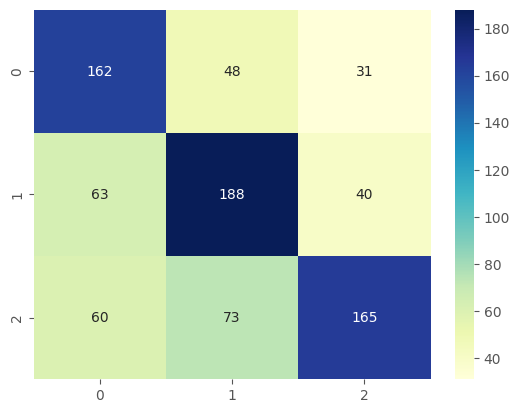

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
predY = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
predY = predY.argmax(axis=1)
testY = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(testY, predY)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()


#### 7.3. Отобразим график обучения

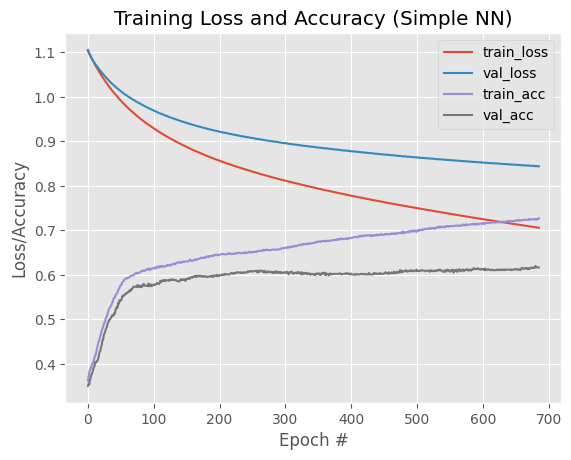

In [ ]:
N = np.arange(0, 686)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_matrix(path, test_X, test_Y, lb):
    model = load_model(path)

    predictions = model.predict(test_X, batch_size=32)

    # Не нужно argmax для test_Y, потому что это обычные метки
    true_labels = test_Y
    pred_labels = predictions.argmax(axis=1)

    # Метрики
    print(classification_report(true_labels, pred_labels, target_names=lb.classes_))

    # Матрица ошибок
    conf_mat = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [ ]:
print("test_Y shape:", testY.shape)
print("predictions shape:", predictions.shape)

test_Y shape: (830,)
predictions shape: (830, 3)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

     Бабочки       0.57      0.67      0.62       241
       Пауки       0.61      0.65      0.63       291
       Слоны       0.70      0.55      0.62       298

    accuracy                           0.62       830
   macro avg       0.63      0.62      0.62       830
weighted avg       0.63      0.62      0.62       830



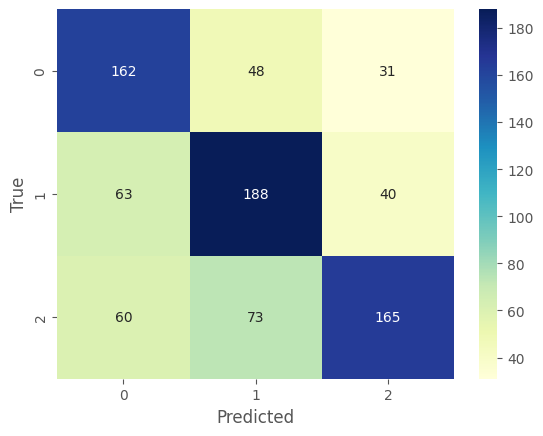

In [ ]:
testX_flat = testX.reshape((testX.shape[0], -1))  # теперь будет (num_samples, 3072)
get_matrix("/content/drive/MyDrive/models/best_model_2_2.h5", testX_flat, testY, lb)

### 8. Сохранение модели и меток классов:

In [ ]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    model.save(model_path, save_format="h5")

    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [ ]:
model_path = "model_2_2(save).h5"
labels_path = "label_bin_2"

save_model_and_labels(model, lb, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 137.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
from keras.models import load_model
import gradio
import pickle
import cv2

def preprocess_image(img, compression_size = 32):

    # Копируем изображение
    image = img.copy()

    # Изменяем размер изображения на 32x32 пикселей
    image = cv2.resize(image, (compression_size, compression_size))

    # Нормализуем изображение и приводим к диапазону [0, 1]
    image = image.astype("float") / 255.0

    # Добавляем размерность для батча
    image = image.reshape((1, compression_size, compression_size, 3))  # нужная форма (1, 32, 32, 3)

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
def get_predict(img, preprocess_func = preprocess_image, model_path = "/content/drive/MyDrive/models/model_2_2(save).h5", label_path = "/content/drive/MyDrive/models/label_bin_2"):
    try:
        model = load_model(model_path)
        lb = pickle.loads(open(label_path, "rb").read())

        # Подготовка изображения
        image = preprocess_func(img)

        # Преобразуем в плоский вид
        image = image.reshape((1, 3072))

        # Предсказание
        preds = model.predict(image).flatten()

        # Преобразование предсказаний в словарь
        confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

        return confidences

    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return f"Произошла ошибка: {e}"

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
lb = pickle.loads(open("/content/drive/MyDrive/models/label_bin_2", "rb").read())

In [ ]:
interface = gradio.Interface(
    fn=get_predict,
    inputs=gradio.Image(label="Загрузите изображение"),
    outputs= gradio.Label(num_top_classes=len(lb.classes_)),
    examples=["/content/drive/MyDrive/animals_dataset/бабочка.jpg",
              "/content/drive/MyDrive/animals_dataset/паук.jpg",
              "/content/drive/MyDrive/animals_dataset/слон.jpg"]
)

interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://39160f002a83f5f112.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
